In [21]:
#Load test data

import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

inputImages=cv2.imread('./zilia/20200228_140744_singe2/000.jpg')

2261
2138


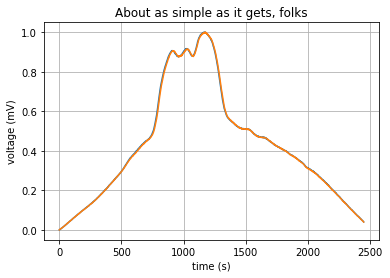

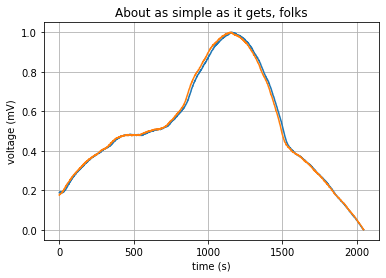

2266
2122


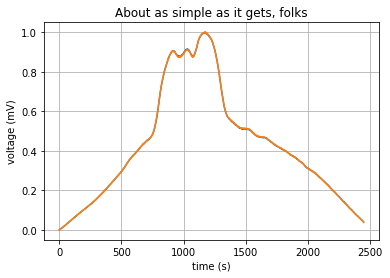

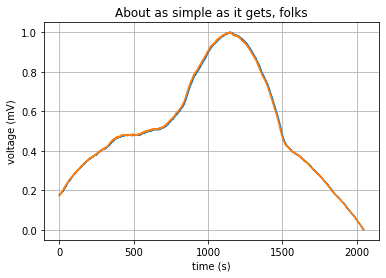

2271
2111


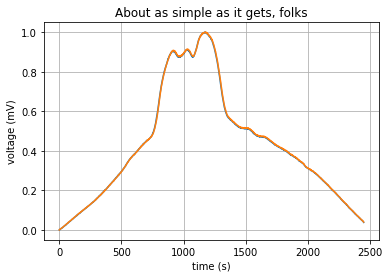

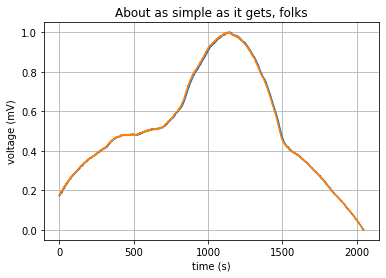

2272
2134


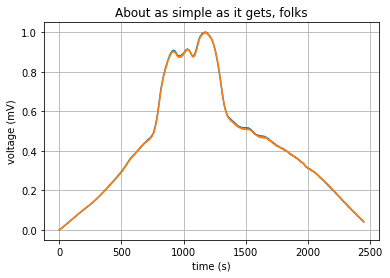

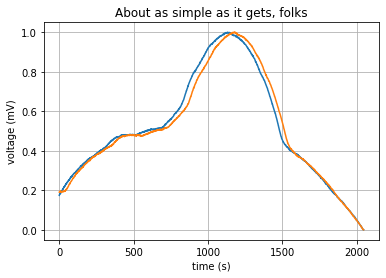

2270
2169


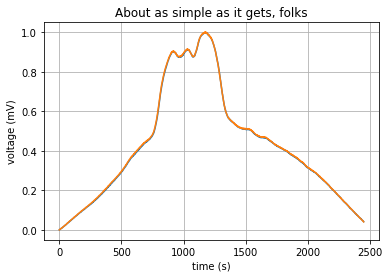

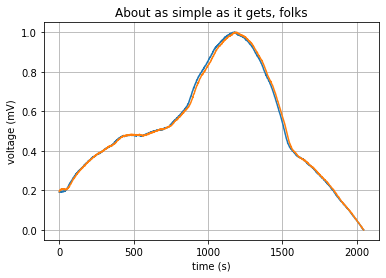

2264
2184


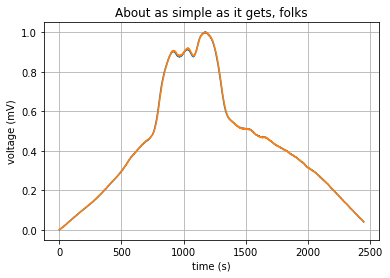

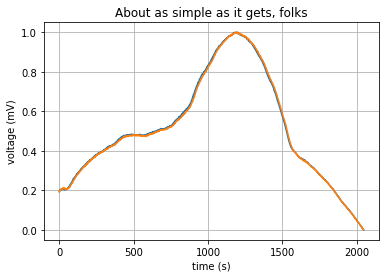

2267
2188


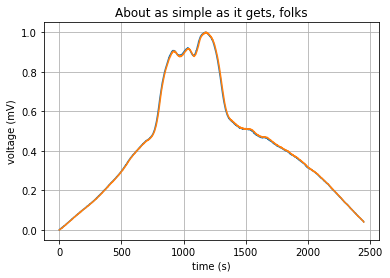

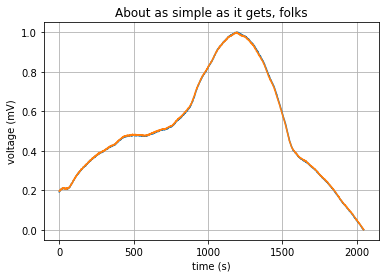

2277
2186


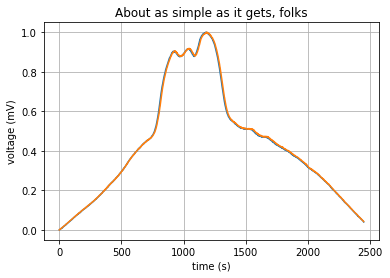

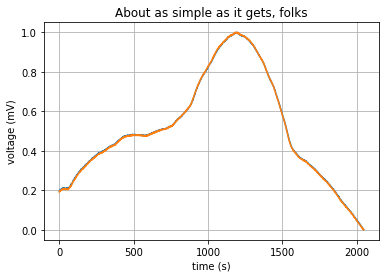

2272
2216


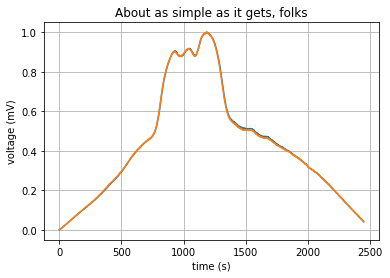

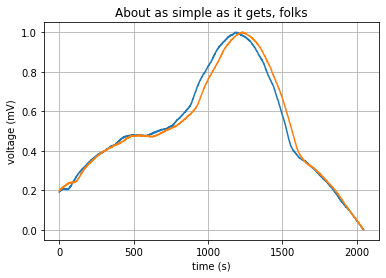

2256
2296


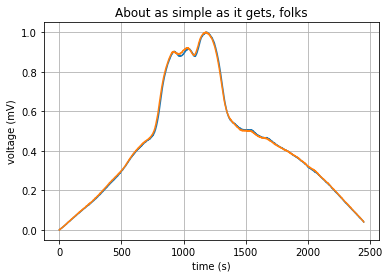

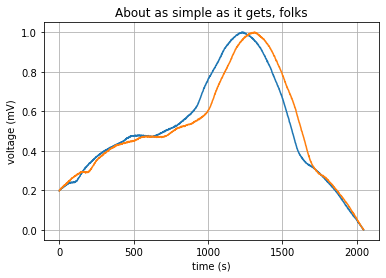

2254
2074


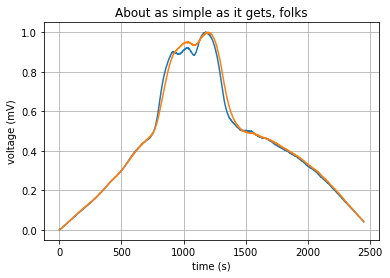

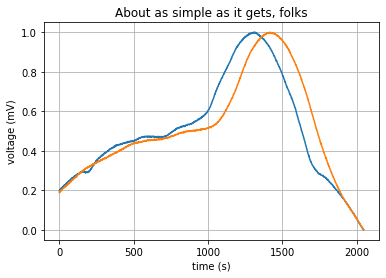

2227
2244


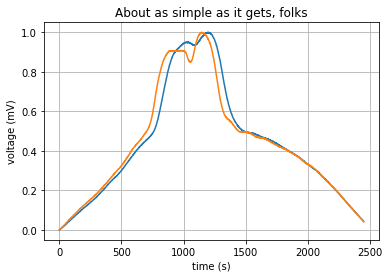

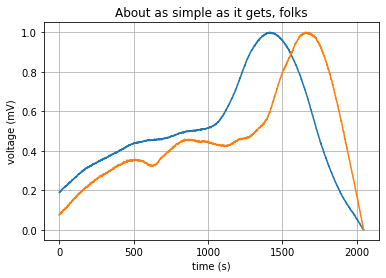

2232
2566


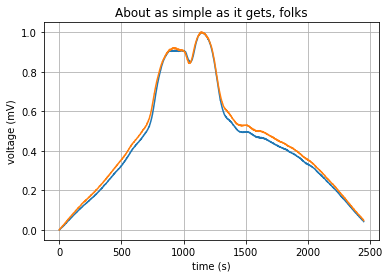

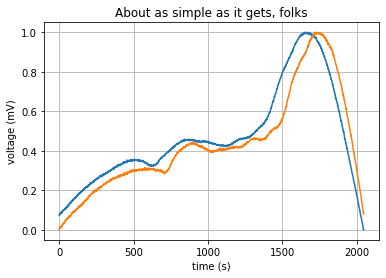

2281
2656


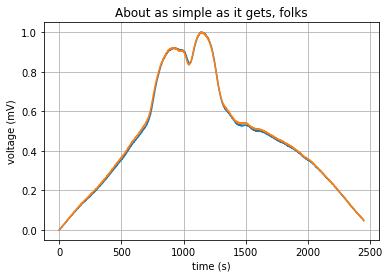

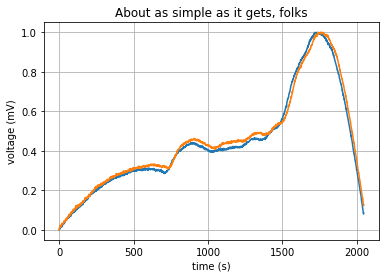

2291
2666


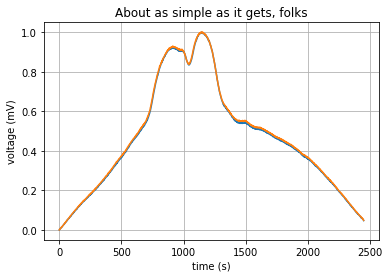

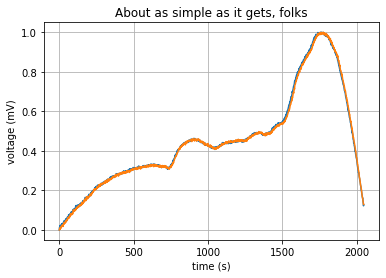

[187. 182. 177. 176. 178. 184. 181. 171. 176. 192. 194. 221. 216. 167.
 157.]
[ -90.  -74.  -63.  -86. -121. -136. -140. -138. -168. -248.  -26. -196.
 -518. -608. -618.]


In [36]:
from skimage.io import imread_collection
import numpy as np

collectionDir = './zilia/20200228_140744_singe2/*.jpg'
imageCollection = imread_collection(collectionDir)


from skimage.color import rgb2gray
grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
#grayImage=np.zeros((len(imageCollection),1900,1900))
axis0Shift=np.array([])
axis1Shift=np.array([])
for i in range(len(imageCollection)):
    grayImage[i,:,:]=((rgb2gray(imageCollection[i])-np.min(rgb2gray(imageCollection[i])))/
                        (np.max(rgb2gray(imageCollection[i]))-np.min(rgb2gray(imageCollection[i]))))
    #grayImage[i,:,:]=grayImage1[i,100:2000,100:2000]
    
    if (i>1 and i%2==1):
#         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
        axis0First=((np.sum(grayImage[i-2,:,:],axis=0)-np.min(np.sum(grayImage[i-2,:,:],axis=0)))/
                        (np.max(np.sum(grayImage[i-2,:,:],axis=0))-np.min(np.sum(grayImage[i-2,:,:],axis=0))))        
#         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
        axis1First=((np.sum(grayImage[i-2,:,:],axis=1)-np.min(np.sum(grayImage[i-2,:,:],axis=1)))/
                        (np.max(np.sum(grayImage[i-2,:,:],axis=1))-np.min(np.sum(grayImage[i-2,:,:],axis=1))))
#         axis0Second=np.sum(grayImage[i,:,:],axis=0)
        axis0Second=((np.sum(grayImage[i,:,:],axis=0)-np.min(np.sum(grayImage[i,:,:],axis=0)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))
#         axis1Second=np.sum(grayImage[i,:,:],axis=1)
        axis1Second=((np.sum(grayImage[i,:,:],axis=1)-np.min(np.sum(grayImage[i,:,:],axis=1)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))
        convAxis0=np.convolve(axis0First,axis0Second)
        convAxis1=np.convolve(axis1First,axis1Second)
        axis0Shift=np.append(axis0Shift,(((2*grayImage[i,:,:].shape[1])/2)-np.argmax(convAxis0)))
        axis1Shift=np.append(axis1Shift,(((2*grayImage[i,:,:].shape[0])/2)-np.argmax(convAxis1)))
        print(np.argmax(convAxis0))
        print(np.argmax(convAxis1))
        
        
        fig, ax = plt.subplots()
        ax.plot(axis0First)
        ax.plot(axis0Second)


        ax.set(xlabel='time (s)', ylabel='voltage (mV)',
               title='About as simple as it gets, folks')
        ax.grid()
####
#         fig.savefig("test.png")
        plt.show()
        fig, ax = plt.subplots()
        ax.plot(axis1First)
        ax.plot(axis1Second)


        ax.set(xlabel='time (s)', ylabel='voltage (mV)',
               title='About as simple as it gets, folks')
        ax.grid()

#         fig.savefig("test.png")
        plt.show()
        
print(axis0Shift) 
print(axis1Shift)
        
        
        


In [86]:
a=np.array([1,2,3,4,3,2,1])
b=np.array([2,3,4,3,2,1,1])
c=np.convolve(a,b,mode='same')
print(c)
print(np.argmax(c))

[28 38 43 41 33 23 14]
2


In [95]:
grayImage.shape

(32, 2048, 2448)

In [57]:
convAxis0.shape

(4095,)

In [58]:
np.argmax(convAxis0)

2047

In [97]:
grayImage[i,:,:].shape[0]

2048

In [101]:
a=grayImage[i-2,:,:]

In [102]:
a.shape

(2048, 2448)

In [105]:
imageCollection[0].shape[1]

2448

In [12]:
convAxis0

array([1.08775298e+08, 1.09016568e+08, 1.09257987e+08, ...,
       1.64909465e+08, 1.64633709e+08, 1.64357463e+08])

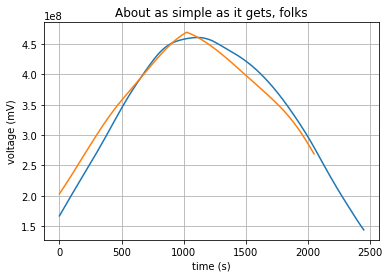

In [21]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(convAxis0)
ax.plot(convAxis1)


ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

0.5002043318349934
1224
y2 is 0.5002043318349934 behind y1


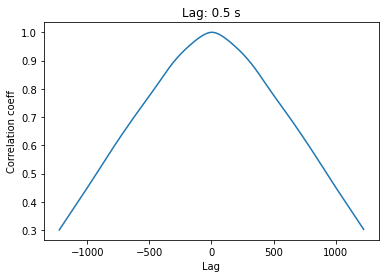

0.5002043318349934
1224
y2 is 0.5002043318349934 behind y1


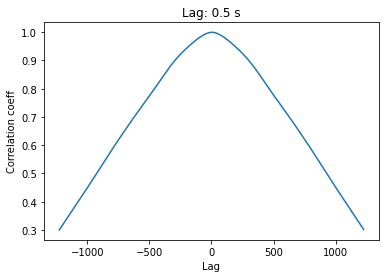

1.5006129955047527
1225
y2 is 1.5006129955047527 behind y1


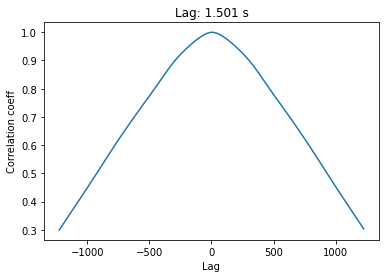

2.501021659174512
1226
y2 is 2.501021659174512 behind y1


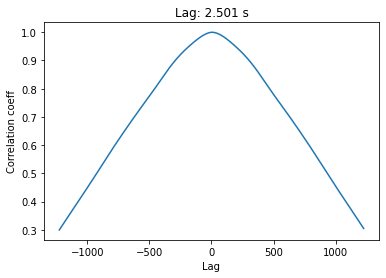

1.5006129955047527
1225
y2 is 1.5006129955047527 behind y1


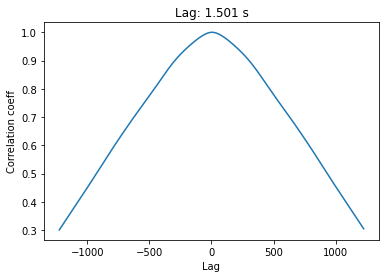

3.5014303228442714
1227
y2 is 3.5014303228442714 behind y1


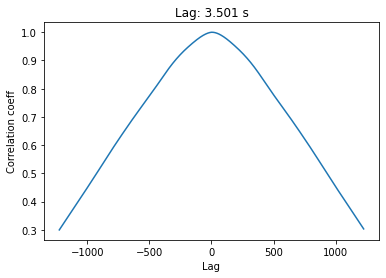

7.503064977523536
1231
y2 is 7.503064977523536 behind y1


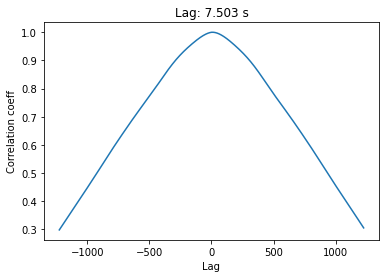

11.5046996322028
1235
y2 is 11.5046996322028 behind y1


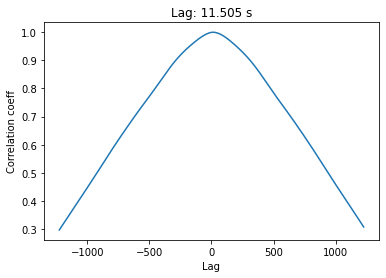

9.503882304863055
1233
y2 is 9.503882304863055 behind y1


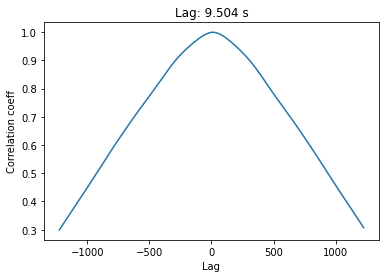

4.501838986514031
1228
y2 is 4.501838986514031 behind y1


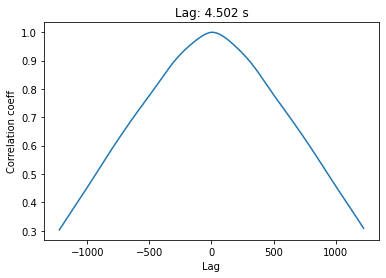

17.507151614221584
1241
y2 is 17.507151614221584 behind y1


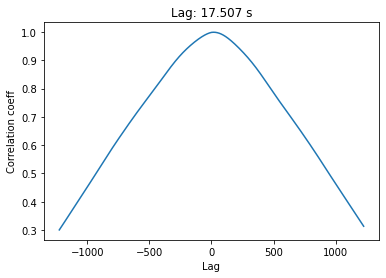

-15.506334286881838
1208
y2 is -15.506334286881838 behind y1


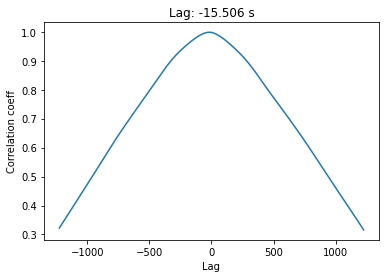

-16.506742950551597
1207
y2 is -16.506742950551597 behind y1


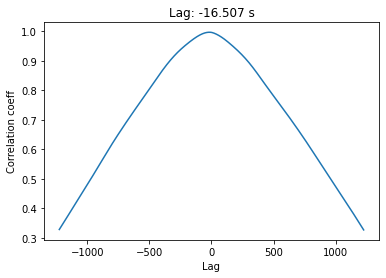

-19.507968941561103
1204
y2 is -19.507968941561103 behind y1


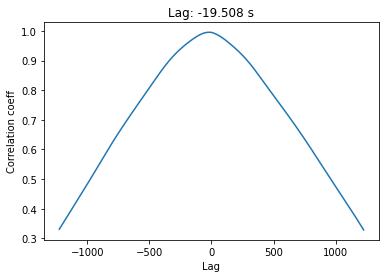

-20.508377605230862
1203
y2 is -20.508377605230862 behind y1


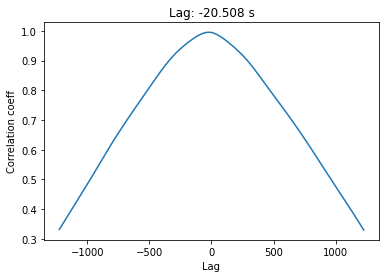

In [28]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np


def lag_finder(y1, y2, sr):
    n = len(y1)

    corr = signal.correlate(y2, y1, mode='same') / np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)])

    delay_arr = np.linspace(-0.5*n/sr, 0.5*n/sr, n)
    delay = delay_arr[np.argmax(corr)]
    print(delay)
    print(np.argmax(corr))
    print('y2 is ' + str(delay) + ' behind y1')

    plt.figure()
    plt.plot(delay_arr, corr)
    plt.title('Lag: ' + str(np.round(delay, 3)) + ' s')
    plt.xlabel('Lag')
    plt.ylabel('Correlation coeff')
    plt.show()

############
from skimage.io import imread_collection
import numpy as np

collectionDir = './zilia/20200228_140744_singe2/*.jpg'
imageCollection = imread_collection(collectionDir)


from skimage.color import rgb2gray
grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
#grayImage=np.zeros((len(imageCollection),1900,1900))
axis0Shift=np.array([])
axis1Shift=np.array([])
for i in range(len(imageCollection)):
    grayImage[i,:,:]=((rgb2gray(imageCollection[i])-np.min(rgb2gray(imageCollection[i])))/
                        (np.max(rgb2gray(imageCollection[i]))-np.min(rgb2gray(imageCollection[i]))))
    #grayImage[i,:,:]=grayImage1[i,100:2000,100:2000]
    
    if (i>1 and i%2==1):
        axis0First=np.sum(grayImage[1,:,:],axis=0)
        axis1First=np.sum(grayImage[1,:,:],axis=1)
        axis0Second=np.sum(grayImage[i,:,:],axis=0)
        axis1Second=np.sum(grayImage[i,:,:],axis=1)
        sr = 1

        lag_finder(axis0First, axis0Second, sr)
#         convAxis0=np.convolve(axis0First,axis0Second)
#         convAxis1=np.convolve(axis1First,axis1Second)
#         axis0Shift=np.append(axis0Shift,(((grayImage[i,:,:].shape[1])/2)-np.argmax(convAxis0)))
#         axis1Shift=np.append(axis1Shift,(((grayImage[i,:,:].shape[0])/2)-np.argmax(convAxis1)))
#         print(np.argmax(convAxis0))
#         print(np.argmax(convAxis1))
        
        
#         fig, ax = plt.subplots()
#         ax.plot(convAxis0)
#         ax.plot(convAxis1)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()

#         fig.savefig("test.png")
#         plt.show()
        
# print(axis0Shift) 
# print(axis1Shift)
        
        
        

    
# Sine sample with some noise and copy to y1 and y2 with a 1-second lag


In [ ]:
from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray

collectionDir = './1111/*.jpg'
imageCollection = imread_collection(collectionDir)



grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
axis0Shift=np.array([])
axis1Shift=np.array([])
for i in range(len(imageCollection)):
#     temp=imageCollection[i][:,:,0]
#     imageCollection[i][:,:,2]=0
#     imageCollection[i][:,:,1]=0
#     grayImage[i,:,:]=100*rgb2gray(imageCollection[i])#-np.min(rgb2gray(imageCollection[i])))/
#                        (np.max(rgb2gray(imageCollection[i]))-np.min(rgb2gray(imageCollection[i]))))
    grayImage[i,:,:]=1.5*((imageCollection[i][:,:,0]))#-np.min(imageCollection[i][:,:,0]))/
#                         (np.max(imageCollection[i][:,:,0])-np.min(imageCollection[i][:,:,0])))
    grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=100)
#     grayImage[grayImage >= 0.8] = 1
#     grayImage[grayImage <= 0.4] = 0
    

#### set test point
    if (i==1):
        #         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
        testLoc0=np.argmax((np.sum(grayImage[i,:,:],axis=0)-np.min(np.sum(grayImage[i,:,:],axis=0)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))        
#         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
        testLoc1=np.argmax((np.sum(grayImage[i,:,:],axis=1)-np.min(np.sum(grayImage[i,:,:],axis=1)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))
        print(testLoc0,testLoc1)


    if (i>1 and i%2==1):
#         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
        axis0First=((np.sum(grayImage[i-2,:,:],axis=0)-np.min(np.sum(grayImage[i-2,:,:],axis=0)))/
                        (np.max(np.sum(grayImage[i-2,:,:],axis=0))-np.min(np.sum(grayImage[i-2,:,:],axis=0))))        
#         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
        axis1First=((np.sum(grayImage[i-2,:,:],axis=1)-np.min(np.sum(grayImage[i-2,:,:],axis=1)))/
                        (np.max(np.sum(grayImage[i-2,:,:],axis=1))-np.min(np.sum(grayImage[i-2,:,:],axis=1))))
#         axis0Second=np.sum(grayImage[i,:,:],axis=0)
        axis0Second=((np.sum(grayImage[i,:,:],axis=0)-np.min(np.sum(grayImage[i,:,:],axis=0)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))
#         axis1Second=np.sum(grayImage[i,:,:],axis=1)
        axis1Second=((np.sum(grayImage[i,:,:],axis=1)-np.min(np.sum(grayImage[i,:,:],axis=1)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))
#         convAxis0=np.convolve(axis0First,axis0Second)
#         convAxis1=np.convolve(axis1First,axis1Second)
#         axis0Shift=np.append(axis0Shift,(np.argmax(axis0First)-np.argmax(axis0Second)))
#         axis1Shift=np.append(axis1Shift,(np.argmax(axis1First)-np.argmax(axis1Second)))
        axis0Shift=np.append(axis0Shift,(testLoc0-np.argmax(axis0Second)))
        axis1Shift=np.append(axis1Shift,(testLoc1-np.argmax(axis1Second)))



#         print(np.argmax(convAxis0))
#         print(np.argmax(convAxis1))
        
        
        window_name = 'Image'  
        # Center coordinates
#         center_coordinates = (int(testLoc0+np.sum(axis0Shift)),int(testLoc1-np.sum(axis1Shift)))
        center_coordinates = (int(np.argmax(axis0Second)),int(np.argmax(axis1Second)))
         
        print(center_coordinates)
        # Radius of circle
        radius = 30
        # Blue color in BGR
        color = (0, 255, 0)
        # Line thickness of 2 px
        thickness = 5
        # Using cv2.circle() method
        # Draw a circle with blue line borders of thickness of 2 px
        image = cv2.circle(imageCollection[i], center_coordinates, radius, color, thickness)
        # Displaying the image 
        cv2.imshow(window_name, imageCollection[i])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        
#         fig, ax = plt.subplots()
#         ax.plot(axis0First)
#         ax.plot(axis0Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# ####
# #         fig.savefig("test.png")
#         plt.show()
#         fig, ax = plt.subplots()
#         ax.plot(axis1First)
#         ax.plot(axis1Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()

# #         fig.savefig("test.png")
#         plt.show()


        
print(axis0Shift) 
print(axis1Shift)
        
        
        


1233 369
(1236, 327)
(1237, 309)
(1236, 307)
(1234, 323)
(1232, 361)
(1228, 399)
(1253, 351)
(1278, 231)
(1285, 0)
(1325, 0)
(1405, 548)
(1446, 581)
(1453, 570)
(1455, 563)
(1459, 560)
(1462, 559)
(1479, 518)
(1454, 0)
(1189, 791)
(1236, 0)
(1199, 0)
(1234, 142)
(1268, 283)
(1224, 205)
(1321, 468)
(1369, 514)
(1379, 527)
(1377, 502)
(1372, 485)
(1362, 472)
(1355, 465)
(1340, 465)
(1329, 464)
(1310, 470)
(1302, 484)
(1286, 500)
(1276, 506)


In [2]:
window_name = 'Image'  
# Center coordinates
center_coordinates = (int(axis0Shift[0]-(np.argmax(axis0First)-np.argmax(axis0Second))),
                      int(axis1Shift[0]-(np.argmax(axis1First)-np.argmax(axis1Second))))
# Radius of circle
radius = 100
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2
# Using cv2.circle() method
# Draw a circle with blue line borders of thickness of 2 px
image = cv2.circle(imageCollection[i], center_coordinates, radius, color, thickness)
# Displaying the image 
cv2.imshow(window_name,imageCollection[i])
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'axis0Shift' is not defined

In [2]:
imageCollection[i][:,:,:]

NameError: name 'imageCollections' is not defined

In [1]:
from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray

collectionDir = './zilia/20200228_140744_singe2/*.jpg'
imageCollection = imread_collection(collectionDir)



grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
axis0Shift=np.array([])
axis1Shift=np.array([])
for i in range(len(imageCollection)):
    imageCollection[i][:,:,2]=0
    grayImage[i,:,:]=((rgb2gray(imageCollection[i])-np.min(rgb2gray(imageCollection[i])))/
                        (np.max(rgb2gray(imageCollection[i]))-np.min(rgb2gray(imageCollection[i]))))
#     grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=50)

In [2]:
imageCollection[5][:,:,2]=0

In [ ]:
window_name = 'Image'  

cv2.imshow(window_name,imageCollection[5])
cv2.waitKey(0)
cv2.destroyAllWindows()